<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#meaning-of-the-columns" data-toc-modified-id="meaning-of-the-columns-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>meaning of the columns</a></span></li><li><span><a href="#What-kind-of-network" data-toc-modified-id="What-kind-of-network-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>What kind of network</a></span></li><li><span><a href="#Inspect-the-network" data-toc-modified-id="Inspect-the-network-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Inspect the network</a></span><ul class="toc-item"><li><span><a href="#All-edges-from-node-1" data-toc-modified-id="All-edges-from-node-1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>All edges from node 1</a></span></li><li><span><a href="#All-edges-between-1-and-2" data-toc-modified-id="All-edges-between-1-and-2-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>All edges between 1 and 2</a></span><ul class="toc-item"><li><span><a href="#what-does-this-mean?" data-toc-modified-id="what-does-this-mean?-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>what does this mean?</a></span></li></ul></li><li><span><a href="#all-edges-between-1-and-390" data-toc-modified-id="all-edges-between-1-and-390-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>all edges between 1 and 390</a></span><ul class="toc-item"><li><span><a href="#What-is-this?" data-toc-modified-id="What-is-this?-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>What is this?</a></span></li></ul></li></ul></li><li><span><a href="#degree-again" data-toc-modified-id="degree-again-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>degree again</a></span></li><li><span><a href="#Components" data-toc-modified-id="Components-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Components</a></span><ul class="toc-item"><li><span><a href="#Prune-the-graph" data-toc-modified-id="Prune-the-graph-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Prune the graph</a></span></li></ul></li><li><span><a href="#Density" data-toc-modified-id="Density-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Density</a></span></li><li><span><a href="#Compute-length-and-density-for-each-component" data-toc-modified-id="Compute-length-and-density-for-each-component-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Compute length and density for each component</a></span></li><li><span><a href="#Cliques" data-toc-modified-id="Cliques-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Cliques</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#flauw" data-toc-modified-id="flauw-8.0.1"><span class="toc-item-num">8.0.1&nbsp;&nbsp;</span>flauw</a></span></li></ul></li></ul></li><li><span><a href="#Path-lengths,-diameter" data-toc-modified-id="Path-lengths,-diameter-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Path lengths, diameter</a></span></li></ul></div>

In [1]:
import pandas as pd
import networkx as nx
import seaborn as sns
%matplotlib inline

In [2]:
DataS1= pd.read_csv('haslemere/Kissler_DataS1.csv', header=None)

print(DataS1.shape)
DataS1.columns=['time','source','target','meters']
DataS1.head()

(102831, 4)


time  source  target  meters
0     1       1     390      17
1     1       2     215       9
2     1       2     246      18
3     1       2     265      45
4     1       5     367      32

# meaning of the columns

__DataS1.csv__ The “Haslemere dataset”, consisting of pairwise distances between users of the BBC Pandemic Haslemere app over time. Each row consists of an encounter (within 50m) between two users. 

* Column 1 gives the time step as an integer value (see DataS2.csv for conversion to real time). 
* Columns 2 and 3 give the user ID numbers. 
* Column 4 gives the distance between the users at that time step, rounded to the nearest metre. 


# What kind of network

1. Undirected.
    * "met each other at time X with distance Y
2. Weighted
    * with the distance
3. Multigraph
    * two nodes can have multiple interactions 
    * for each timestamp we create an edge.
    * Thus multiple edges between nodes are possible.

In [3]:
G= nx.from_pandas_edgelist(DataS1,'source','target',
                           edge_attr=['meters'],
                          create_using=nx.MultiGraph(),
                          edge_key='time') # New in 2.5 !pip install --upgrade networkx

# Inspect the network

In [4]:
# number of nodes

G.number_of_nodes(), len(G), len(G.nodes), len(G.nodes())

(469, 469, 469, 469)

## All edges from node 1

* A dict with nodes as keys
    * and a dict of edges as values
    * each edge has a **timestamp** as key,
    * and a dict with the distance as value

In [5]:
list(G.neighbors(1)),G.degree(1)

([390,
  234,
  389,
  4,
  127,
  172,
  184,
  415,
  459,
  203,
  76,
  311,
  425,
  448,
  249,
  409,
  2,
  201,
  325,
  460,
  138,
  131,
  209,
  106,
  107,
  211,
  447,
  171,
  49,
  449,
  189,
  125,
  174,
  191,
  259,
  287,
  82,
  199,
  464,
  84,
  392,
  86,
  44,
  179,
  235,
  302,
  66,
  327,
  384,
  439,
  445],
 368)

In [6]:
G[1]

AdjacencyView({390: {1: {'meters': 17}, 2: {'meters': 17}, 3: {'meters': 17}, 4: {'meters': 17}, 5: {'meters': 17}, 6: {'meters': 2}, 7: {'meters': 2}, 8: {'meters': 2}, 9: {'meters': 2}, 10: {'meters': 7}, 11: {'meters': 8}, 12: {'meters': 4}, 13: {'meters': 7}, 14: {'meters': 6}, 15: {'meters': 8}, 16: {'meters': 8}, 17: {'meters': 14}, 18: {'meters': 11}, 19: {'meters': 11}, 134: {'meters': 4}, 135: {'meters': 0}, 136: {'meters': 0}, 137: {'meters': 0}, 138: {'meters': 0}, 139: {'meters': 0}, 140: {'meters': 0}, 141: {'meters': 0}, 142: {'meters': 0}, 143: {'meters': 0}, 144: {'meters': 0}, 145: {'meters': 0}, 146: {'meters': 0}, 147: {'meters': 0}, 148: {'meters': 0}, 149: {'meters': 0}, 150: {'meters': 3}, 151: {'meters': 0}, 152: {'meters': 0}, 153: {'meters': 0}, 154: {'meters': 0}, 155: {'meters': 7}, 156: {'meters': 7}, 174: {'meters': 11}, 175: {'meters': 0}, 176: {'meters': 0}, 177: {'meters': 0}, 178: {'meters': 0}, 179: {'meters': 0}, 180: {'meters': 4}, 181: {'meters': 0}

## All edges between 1 and 2

In [7]:
G[1][2]

AtlasView({126: {'meters': 45}, 131: {'meters': 25}})

In [8]:
# just checking
G[2][1]

AtlasView({126: {'meters': 45}, 131: {'meters': 25}})

### what does this mean?

* there are two edges
* at timepoints 126 and 131
* with distances 45 and 25 meters, respectively

## all edges between 1 and 390

In [9]:
G[1][390]

AtlasView({1: {'meters': 17}, 2: {'meters': 17}, 3: {'meters': 17}, 4: {'meters': 17}, 5: {'meters': 17}, 6: {'meters': 2}, 7: {'meters': 2}, 8: {'meters': 2}, 9: {'meters': 2}, 10: {'meters': 7}, 11: {'meters': 8}, 12: {'meters': 4}, 13: {'meters': 7}, 14: {'meters': 6}, 15: {'meters': 8}, 16: {'meters': 8}, 17: {'meters': 14}, 18: {'meters': 11}, 19: {'meters': 11}, 134: {'meters': 4}, 135: {'meters': 0}, 136: {'meters': 0}, 137: {'meters': 0}, 138: {'meters': 0}, 139: {'meters': 0}, 140: {'meters': 0}, 141: {'meters': 0}, 142: {'meters': 0}, 143: {'meters': 0}, 144: {'meters': 0}, 145: {'meters': 0}, 146: {'meters': 0}, 147: {'meters': 0}, 148: {'meters': 0}, 149: {'meters': 0}, 150: {'meters': 3}, 151: {'meters': 0}, 152: {'meters': 0}, 153: {'meters': 0}, 154: {'meters': 0}, 155: {'meters': 7}, 156: {'meters': 7}, 174: {'meters': 11}, 175: {'meters': 0}, 176: {'meters': 0}, 177: {'meters': 0}, 178: {'meters': 0}, 179: {'meters': 0}, 180: {'meters': 4}, 181: {'meters': 0}, 182: {'m

### What is this?

* When 1 and 390 were "close" (at range less than 50 meters)
* let s plot this

In [10]:
# dict comprehension

effe= {time: d['meters'] for (time,d) in G[1][390].items()}


pd.Series(effe).plot(
kind='bar', figsize=(16,7),
title='distance between nodes 1 and 390 over time in meters');

# degree again

* recall that the degree of node 2 was 30
* i.e., it met 30 other people

220

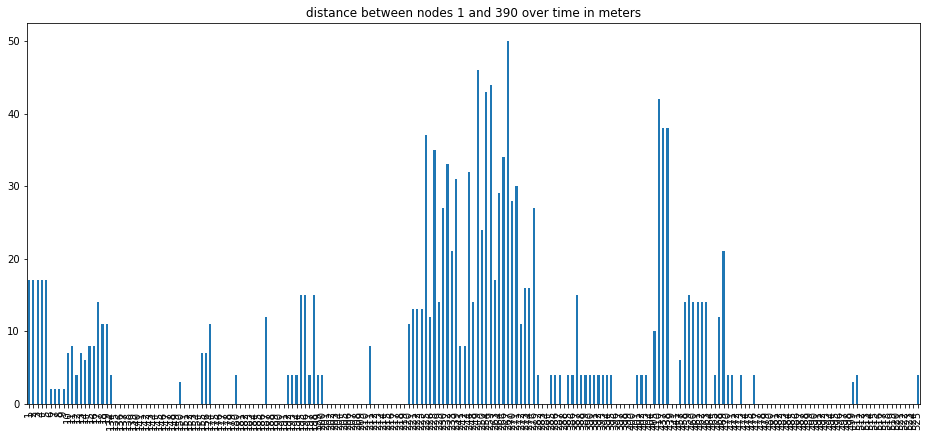

In [11]:
G.degree[2] # counts the number of edges adjacent to 2

In [12]:
len(G[2])  # G[2] is a dict with the adjacent nodes as keys, thus that is 

30

In [13]:
# simple dict comprehension

degree_distribution=pd.Series({node:len(G[node]) for node in G})
degree_distribution



1      51
390     7
2      30
215    67
246    35
       ..
71     15
247    11
264     8
254    12
451    14
Length: 469, dtype: int64

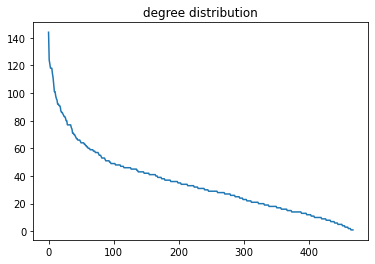

In [14]:
# Same as before
degree_distribution.sort_values(ascending =False).reset_index()[0].plot(
title='degree distribution');

# Components

* Can we travel from every node, **via a path**, to every other node?
    * If yes, we call a graph **connected**
    * If no, the graph consists of a number of **components**

In [15]:
nx.number_connected_components(G)

1

In [16]:
nx.is_connected(G)

True

## Prune the graph

* Let s remove all edges whose distance is more than 2 meters
* Let s also turn it into a **simple graph**, 
    * no more multi-edges
    * so there is an edge if the ndes were at least once within 2 meters distance
* How many components do we have?

In [17]:
non_dangerous_edges=[(s,t,m) for (s,t,m) in G.edges if m > 2]

H= G.copy()
H.remove_edges_from(non_dangerous_edges)
H=nx.Graph(H)
nx.number_connected_components(H)


276

In [18]:
# list the connected components
list(nx.connected_components(H))[:5]

[{1, 390},
 {2, 21, 181, 189, 215, 246, 265, 276, 330, 361, 375, 378, 429},
 {5, 11, 22, 39, 78, 367, 430},
 {8, 10},
 {9, 130, 218, 274}]

In [19]:
# how many do we have for each size?

from collections import Counter

Counter([len(component) for component in nx.connected_components(H)])

Counter({2: 40,
         13: 2,
         7: 3,
         4: 12,
         3: 18,
         16: 1,
         6: 1,
         8: 1,
         9: 1,
         5: 1,
         1: 196})

20 13


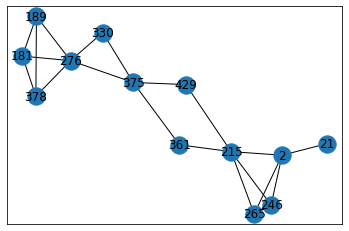

In [20]:
# lets draw one component

a_component=H.subgraph({2, 21, 181, 189, 215, 246, 265, 276, 330, 361, 375, 378, 429})

print(nx.number_of_edges(a_component), nx.number_of_nodes(a_component))
nx.draw_networkx(a_component)

# Density

* the relative number of edges
* In a **simple undirected** graph this is 
    * the number of existing edges
    * divided by
    * the maximum number of edges (with that amount of nodes)
        * whcih equals $N\cdot (N-1)/2$

In [21]:
# density by networkx
print(nx.density(a_component))

0.2564102564102564


In [22]:
# check with our own formula
N= nx.number_of_nodes(a_component)

nx.number_of_edges(a_component)/ (N*(N-1)/2)

0.2564102564102564

# Compute length and density for each component

* Of course with a comprehension
* and a nice plot
* we exclude singleton components

In [23]:
data= [(len(component), nx.density(H.subgraph(component)))
     for component in nx.connected_components(H)
       if len(component)>1
]
data[:5]

[(2, 1.0),
 (13, 0.2564102564102564),
 (7, 0.3333333333333333),
 (2, 1.0),
 (4, 0.5)]

In [24]:
# average density per size of a component
df= pd.DataFrame(data)
df.columns=['size','density']
df.groupby('size')['density'].mean()
# conclsuion: the smaller the graph, the more dense (pretty obvious eh)

size
2     1.000000
3     0.944444
4     0.819444
5     0.800000
6     0.400000
7     0.476190
8     0.535714
9     0.333333
13    0.243590
16    0.283333
Name: density, dtype: float64

# Cliques

* A graph is a clique if and only if all edges are directly connected to each other
* iff its density equals 1

### flauw

* elk paartje is een clique

In [25]:
df['clique']= df.density==1
print("Number of cliques: ", df.clique.sum())

#  percentage cliques per size
df.groupby('size')['clique'].mean() *100

Number of cliques:  60


size
2     100.000000
3      83.333333
4      41.666667
5       0.000000
6       0.000000
7       0.000000
8       0.000000
9       0.000000
13      0.000000
16      0.000000
Name: clique, dtype: float64

# Path lengths, diameter

* OK, not in all components is everuone connected to everyone,
* but what is **the minimal number of steps needed** in each component to go from one node to another?
* this is called the **diameter** of a network

6

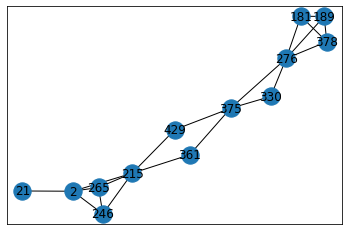

In [26]:
nx.draw_networkx(a_component)
nx.diameter(a_component)

In [27]:
# compute the diameter for each componenet

data= [(len(component), 
        nx.density(nx.Graph(G.subgraph(component))),
       nx.diameter(nx.Graph(G.subgraph(component))))
     for component in nx.connected_components(H)
       if len(component)>1
]
data[:5]

[(2, 1.0, 1),
 (13, 0.3333333333333333, 5),
 (7, 0.7142857142857143, 2),
 (2, 1.0, 1),
 (4, 0.8333333333333334, 2)]

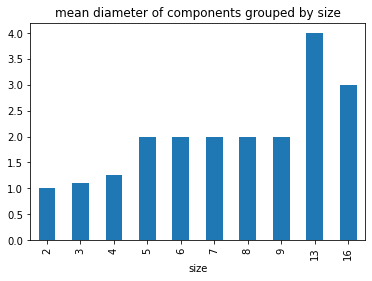

In [28]:
# turn to dataframe again

df= pd.DataFrame(data)
df.columns=['size','density','diameter']
df.groupby('size')['diameter'].mean().plot(kind='bar',
                                          title='mean diameter of components grouped by size');

In [29]:
df.diameter.describe()

count    80.000000
mean      1.250000
std       0.626422
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       5.000000
Name: diameter, dtype: float64

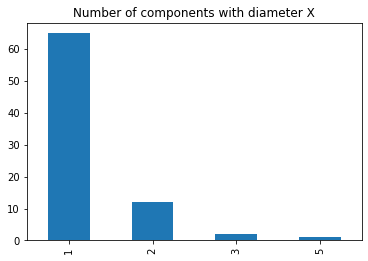

In [30]:
df.diameter.value_counts().plot(kind='bar',
                               title='Number of components with diameter X');

In [31]:
#!jupyter nbconvert --to slides --post serve --ServePostProcessor.port=8001 --ServerPostProcessor.ip='*' FromSpreadsheetToNetwork.ipynb